Precision: 0.58
Recall: 0.60
F1-Score: 0.58


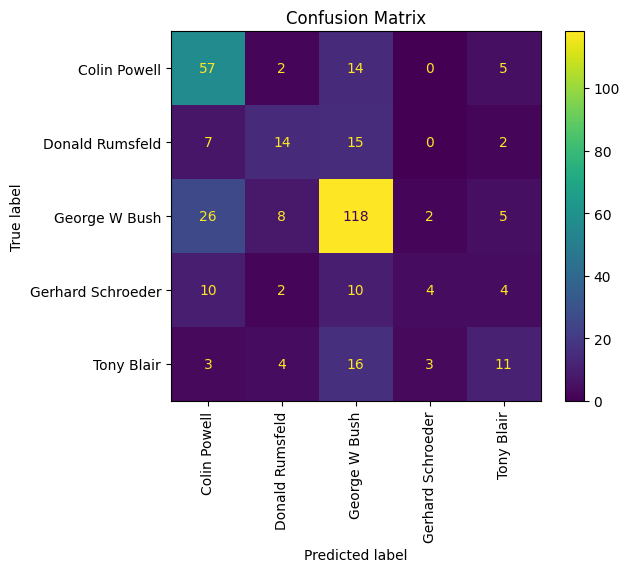

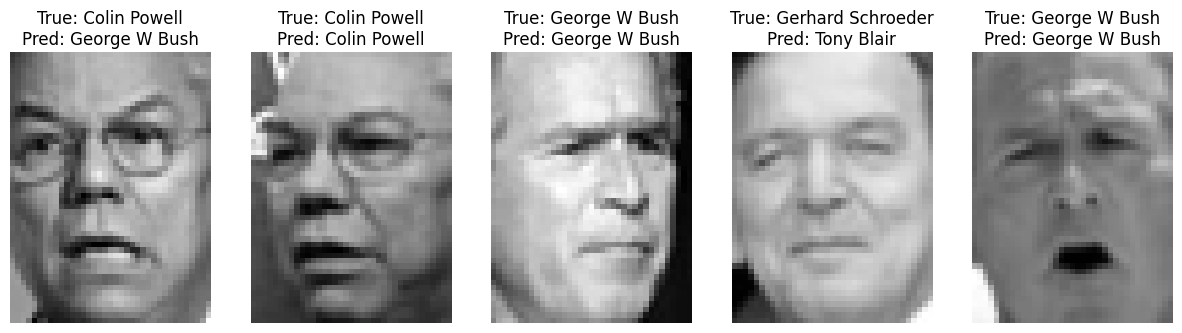

In [5]:
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset (Labeled Faces in the Wild)
from sklearn.datasets import fetch_lfw_people

# Fetch the dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
images = lfw_dataset.images
labels = lfw_dataset.target

# Preprocessing
X = images.reshape(images.shape[0], -1)  # Flatten the images
y = labels

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple face recognition model (e.g., k-NN classifier)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=lfw_dataset.target_names, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

# Visualize some predictions
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(images.shape[1], images.shape[2]), cmap='gray')
    ax.set_title(f"True: {lfw_dataset.target_names[y_test[i]]}\nPred: {lfw_dataset.target_names[y_pred[i]]}")
    ax.axis('off')
plt.show()

# Dataset link (for reference):
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html
